
<div class="markdown-google-sans">
  <h2>Ersilia eos60li</h1>
</div>

Here we will evalute the model :)

In [5]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [6]:
## Mount google drive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


<div class="markdown-google-sans">

### **Data processing**
</div>

<div>

In this notebook, I am loading a list of molecules from reference library.

</div>

In [7]:
# specify input folder, output folder, smiles column

input_folder = "/content/drive/MyDrive/Ersilia"
output_folder = "/content/output"
smiles_column = "smiles"

In [11]:

#finding number of smiles

import pandas as pd

#path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv("/content/reference_library (1).csv")
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES :)")

My dataset contains 1000 SMILES :)


<div class="markdown-google-sans">

#### I have used eos6oli from Ersilia Model Hub to run predictions for given data. link to [here](https://ersilia.io/model-hub)
</div>


In [12]:
# Enter the model name
model_name = "eos6oli"

In [13]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-ctcyx309
Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.12.12 |       h06a430

In [14]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:41281
   PID: 50018
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


#Model Bias Evaluation
Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [15]:
# @title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 60.77 seconds


In [16]:
# @title ✔️ Check your results

print(output.head())

                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  solubility  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1      -3.454  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1      -4.502  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl      -2.900  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...      -4.777  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...      -4.473  


In [17]:
# @title 💾 Save your results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

AS per intructions I ploted scatered plot! but seems like it is not visualizing what we really want to. SO, I prefered to visualize data in histogram. Now, we can easily see freqencies of each compond and their solubility

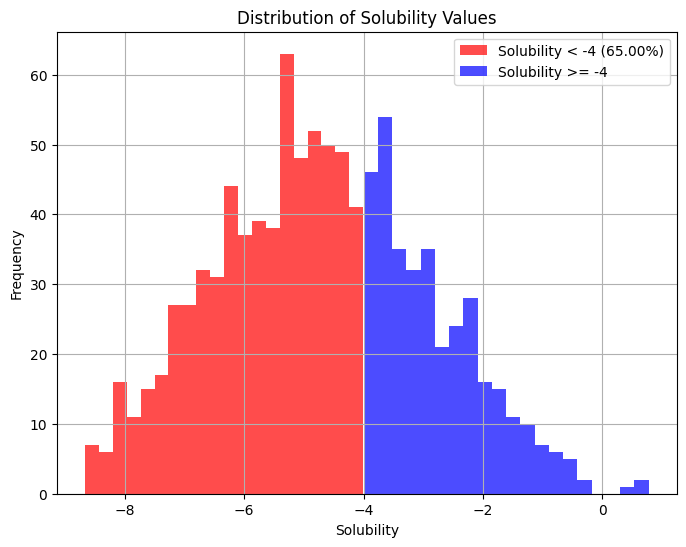

In [19]:
# Extract the solubility values from the DataFrame
solubility_values = output['solubility']


# Calculate the percentage of solubility values less than -4
percentage_less_than_minus_4 = (solubility_values < -4).mean() * 100

# Create two histograms: one for solubility values less than -4 and another for greater than or equal to -4
plt.figure(figsize=(8, 6))

# Histogram for solubility values less than -4
plt.hist(solubility_values[solubility_values < -4], bins=20, color='red', alpha=0.7, label=f'Solubility < -4 ({percentage_less_than_minus_4:.2f}%)')

# Histogram for solubility values greater than or equal to -4
plt.hist(solubility_values[solubility_values >= -4], bins=20, color='blue', alpha=0.7, label='Solubility >= -4')

plt.title('Distribution of Solubility Values')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


### **Compounds can be classified according to solubility values (LogS); Compounds with 0 and higher solubility value are highly soluble, those in the range of 0 to −2 are soluble, those in the range of −2 to −4 are slightly soluble and insoluble if less than −4. lets find out how many of them are highly soluble, slightly soluble and insoluble**

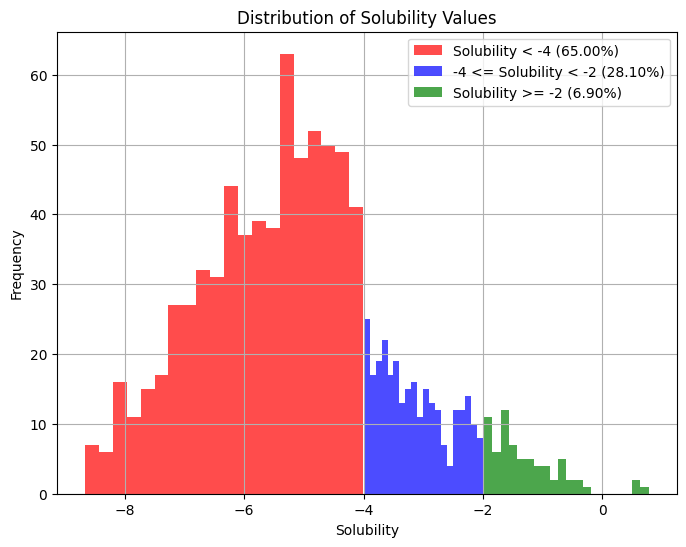

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output data from the saved CSV file
output_path = "/content/output/eos6oli_output.csv"  # Update this with the correct path
output = pd.read_csv(output_path)

# Extract the solubility values from the DataFrame
solubility_values = output['solubility']

# Calculate the percentage of solubility values in each category
percentage_less_than_minus_4 = (solubility_values < -4).mean() * 100
percentage_minus_4_to_minus_2 = ((solubility_values >= -4) & (solubility_values < -2)).mean() * 100
percentage_above_minus_2 = (solubility_values >= -2).mean() * 100

# Create three histograms for each category
plt.figure(figsize=(8, 6))

# Histogram for solubility values less than -4
plt.hist(solubility_values[solubility_values < -4], bins=20, color='red', alpha=0.7, label=f'Solubility < -4 ({percentage_less_than_minus_4:.2f}%)')

# Histogram for solubility values between -4 and -2
plt.hist(solubility_values[(solubility_values >= -4) & (solubility_values < -2)], bins=20, color='blue', alpha=0.7, label=f'-4 <= Solubility < -2 ({percentage_minus_4_to_minus_2:.2f}%)')

# Histogram for solubility values greater than or equal to -2
plt.hist(solubility_values[solubility_values >= -2], bins=20, color='green', alpha=0.7, label=f'Solubility >= -2 ({percentage_above_minus_2:.2f}%)')

plt.title('Distribution of Solubility Values')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)

# Add legend
plt.legend()

plt.show()

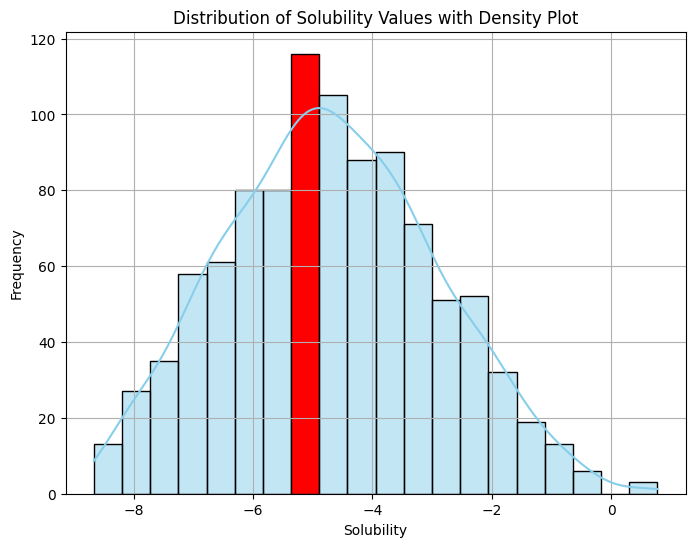

In [25]:
# Create a histogram with density plot
plt.figure(figsize=(8, 6))
sns.histplot(solubility_values, bins=20, kde=True, color='skyblue', edgecolor='black')

# Find the bin with the highest frequency
highest_bin = plt.gca().patches[max(range(len(plt.gca().patches)), key=lambda i: plt.gca().patches[i].get_height())]

# Highlight the bin with the highest frequency with a different color
highest_bin.set_facecolor('red')

plt.title('Distribution of Solubility Values with Density Plot')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Model bias evaluation**

here we can see that majority of predictions are in the middle of graph, from this we can infer that we can fine tune is model which can make easily help us to classify from this regression problem.

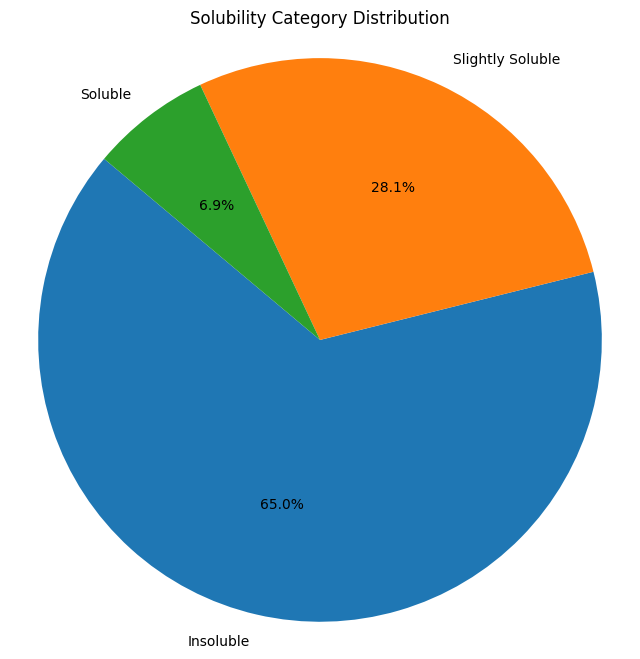

In [24]:
# Define the categories based on solubility values
def categorize_solubility(solubility):
    if solubility < -4:
        return 'Insoluble'
    elif solubility >= -4 and solubility < -2:
        return 'Slightly Soluble'
    else:
        return 'Soluble'

# Apply the categorization function to create a new column
output['Solubility Category'] = output['solubility'].apply(categorize_solubility)

# Calculate the frequency distribution of solubility categories
frequency_distribution = output['Solubility Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency_distribution, labels=frequency_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Solubility Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Majoity of predictions are insoluble! from this graph